In [16]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import plotly.express as px
import numpy as np

In [3]:
def f(x):
    
    return df[df["month"]==x]
#interact(f, x=10);


In [4]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
interact(f, x=list(df["month"].unique()));

interactive(children=(Dropdown(description='x', options=(1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Out…

In [8]:

def f(x):
    
    
    return px.scatter(x=[x],y=[2])

interact(f, x=list(df["month"].unique()));

interactive(children=(Dropdown(description='x', options=(1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Out…

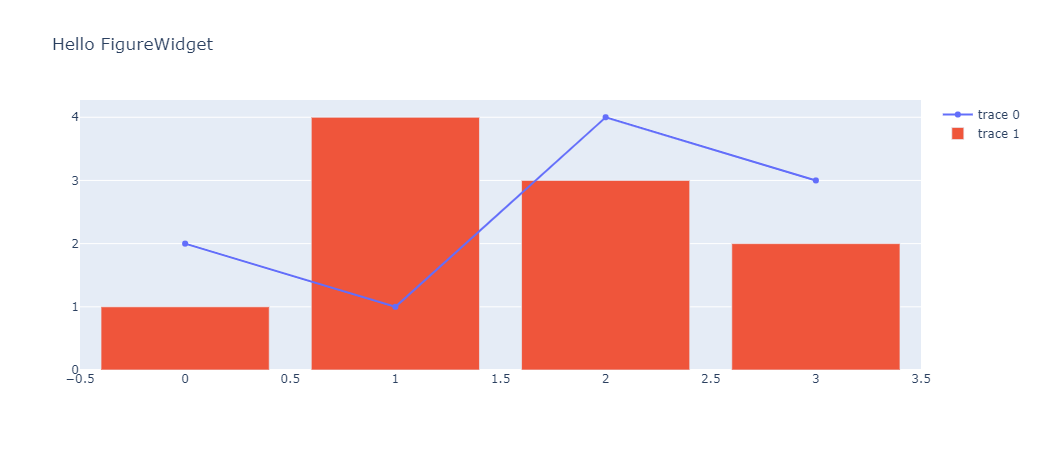

In [10]:
import plotly.graph_objects as go
import ipywidgets as widgets 

f = go.FigureWidget()
f.add_scatter(y=[2, 1, 4, 3]);
f.add_bar(y=[1, 4, 3, 2]);
f.layout.title = 'Hello FigureWidget'
f.show()
f.write_html("Sur.html")

In [3]:
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import widgets

In [8]:
x=np.arange(10);
y=2*x+5
px.scatter(x=x,y=y)

def hola (x):
    x=np.arange(x)
    y=2*x+5
    fig=px.scatter(x=x,y=y,)
    fig.show()
widgets.interact(hola,x=widgets.IntSlider(min=1,max=10))


interactive(children=(IntSlider(value=1, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.hola(x)>

In [12]:
carrera= widgets.Dropdown(description='Carrier:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)
carrera

Dropdown(description='Carrier:   ', index=3, options=('UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'F…

In [13]:
def hola (x):
    yf=df[df['carrier']==x]
    fig=go.Figure()
    fig.add_trace(go.Bar(x=yf['carrier'],y=yf['air_time']))
    return go.FigureWidget(fig)
display(hola(carrera))

FigureWidget({
    'data': [{'type': 'bar',
              'uid': '46bfb906-3cb7-431a-8ad7-7746a6f40cde',
     …

In [25]:
slider=widgets.IntSlider(min=1,max=10,value=5)
def prueba(x):
    x=np.arange(x)
    y=x*3-3
    fig=px.scatter(x=x,y=y)
    fig.show()
widgets.interact(prueba,x=slider)


interactive(children=(IntSlider(value=5, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.prueba(x)>

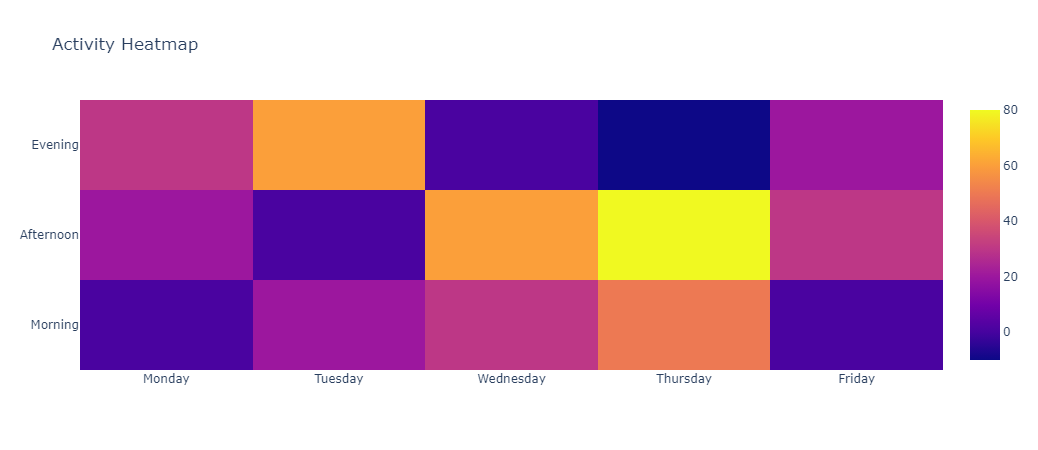

In [7]:
trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'])
data=[trace]
layout = go.Layout(title='Activity Heatmap')

figure = go.Figure(data=data, layout=layout)

f2 = go.FigureWidget(figure)
f2.show()

In [26]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.graph_objects as go
from ipywidgets import widgets
df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])

textbox = widgets.Dropdown(
    description='Airline:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))
def validate():
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['carrier'] == textbox.value,
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")
container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])


In [31]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import plotly.express as px
import numpy as np
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p ipywidgets,pandas,numpy,plotly,watermark 

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.19.0

ipywidgets: 7.6.3
pandas    : 1.2.0
numpy     : 1.19.2
plotly    : 4.14.3
watermark : 2.1.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 11, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sun Jan 17 2021 16:50:32SA Western Standard Time



In [30]:
!pip install watermark